In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#Use featureHasher possible .. a good alternative from CountVectorizer, can potentially use less memory  
from sklearn.feature_extraction import FeatureHasher
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
new_data = pd.read_csv('../database-files/output.csv')

In [4]:
new_data

,Unnamed: 0,Source,Dna,zf,f1,f2,f3,ex
0,0,'',ctcgcgGCGgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,ex-
1,1,'',ctcgcgGTTgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,RSDERKRHTKI,ex-
2,2,'',ctcgatTACgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,TSGNLVRHTKI,ex-
3,3,'',ctcgatTATgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,TSGNLVRHTKI,ex-
4,4,'',ctcgatTCTgcggcc,3,KSADLKRHIRI,RSDHLTTHIRT,TSGNLVRHTKI,ex-
...,...,...,...,...,...,...,...,...
1165,1165,'',cccgcgGTTgcgtcc,3,KSADLKRHIRI,TADKLSRHIRT,RSDERKRHTKI,ex-
1166,1166,'',cccgcgGCGgcgtcc,3,KSADLKRHIRI,TADKLSRHIRT,RSDERKRHTKI,ex-
1167,1167,'',cccgcgGCAgcgtcc,3,KSADLKRHIRI,TADKLSRHIRT,RSDERKRHTKI,ex-
1168,1168,'',cccgcgGCTgcgtcc,3,KSADLKRHIRI,TADKLSRHIRT,RSDERKRHTKI,ex-


In [5]:
positiveExamples = new_data.loc[(new_data['ex'] == "ex+") | (new_data['ex'] == "+")]
negativeExamples = new_data.loc[(new_data['ex'] == "ex-") | (new_data['ex'] == "-")]

In [6]:
print(positiveExamples)

     Unnamed: 0 Source              Dna  zf           f1           f2  \
8             8     ''  ctcgatAAAgcggcc   3  KSADLKRHIRI  QRANLRAHIRT   
9             9     ''  ctcgatAACgcggcc   3  KSADLKRHIRI  DSGNLRVHIRT   
10           10     ''  ctcgatAAGgcggcc   3  KSADLKRHIRI  RSDTLSNHIRT   
11           11     ''  ctcgatAATgcggcc   3  KSADLKRHIRI  TTGNLTVHIRT   
12           12     ''  ctcgatACAgcggcc   3  KSADLKRHIRI  SPADLTRHIRT   
..          ...    ...              ...  ..          ...          ...   
777         777     ''  cccgcgGGCgcgtcc   3  KSADLKRHIRI  QSSKLVRHIRT   
778         778     ''  cccgcgGGTgcgtcc   3  KSADLKRHIRI  TSGHLVRHIRT   
779         779     ''  cccgcgGGCgcgtcc   3  KSADLKRHIRI  TSGKLVRHIRT   
780         780     ''  cccgcgGGTgcgtcc   3  KSADLKRHIRI  TADHLSRHIRT   
781         781     ''  cccgcgGGGgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   

              f3   ex  
8    TSGNLVRHTKI  ex+  
9    TSGNLVRHTKI  ex+  
10   TSGNLVRHTKI  ex+  
11   TSGNLVRHTKI  ex+  
12 

In [7]:
print(negativeExamples)

      Unnamed: 0 Source              Dna  zf           f1           f2  \
0              0     ''  ctcgcgGCGgcggcc   3  KSADLKRHIRI  RSDHLTTHIRT   
1              1     ''  ctcgcgGTTgcggcc   3  KSADLKRHIRI  RSDHLTTHIRT   
2              2     ''  ctcgatTACgcggcc   3  KSADLKRHIRI  RSDHLTTHIRT   
3              3     ''  ctcgatTATgcggcc   3  KSADLKRHIRI  RSDHLTTHIRT   
4              4     ''  ctcgatTCTgcggcc   3  KSADLKRHIRI  RSDHLTTHIRT   
...          ...    ...              ...  ..          ...          ...   
1165        1165     ''  cccgcgGTTgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   
1166        1166     ''  cccgcgGCGgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   
1167        1167     ''  cccgcgGCAgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   
1168        1168     ''  cccgcgGCTgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   
1169        1169     ''  cccgcgGCCgcgtcc   3  KSADLKRHIRI  TADKLSRHIRT   

               f3   ex  
0     RSDERKRHTKI  ex-  
1     RSDERKRHTKI  ex-  
2     TSGNLVRHTKI  ex-  
3     TSGNL

In [8]:
print(len(positiveExamples))
print(len(negativeExamples))

255
915


In [9]:
combined_data = pd.concat([positiveExamples, negativeExamples])

In [10]:
pos_combined_dna_with_zinc = []
pos_dna = []
for index, row in positiveExamples.iterrows():
    pos_seq_dna_with_zinc = (row['f1'] + row['f2'] + row['f3'])
    pos_combined_dna_with_zinc.append(pos_seq_dna_with_zinc)
    pos_dna_seq = row['Dna']
    pos_dna.append(pos_dna_seq)

neg_combined_dna_with_zinc = []
neg_dna = []
for index, row in negativeExamples.iterrows():
    neg_seq_dna_with_zinc = (row['f1'] + row['f2'] + row['f3'])
    neg_combined_dna_with_zinc.append(neg_seq_dna_with_zinc)
    neg_dna_seq = row['Dna']
    neg_dna.append(neg_dna_seq)

In [11]:
def kmers(sequence, kmer_length=4):
    return[sequence[x:x+kmer_length].lower() for x in range(len(sequence) - kmer_length + 1)]

In [12]:
pos_df = pd.DataFrame(data=pos_combined_dna_with_zinc, columns=['Zinc'])
neg_df = pd.DataFrame(data=neg_combined_dna_with_zinc, columns=['Zinc'])

In [13]:
pos_df['kmers_with_zinc'] = pos_df.apply(lambda x: kmers(x['Zinc']), axis = 1)

In [14]:
neg_df['kmers_with_zinc'] = neg_df.apply(lambda x: kmers(x['Zinc']), axis = 1)

In [15]:
pos_df['Dna'] = pos_dna

In [16]:
neg_df['Dna'] = neg_dna

In [17]:
dna_combined = pd.concat([pos_df, neg_df])

In [18]:
pos_and_neg = pd.concat([pos_df, neg_df])
pos_and_neg

,Zinc,kmers_with_zinc,Dna
0,KSADLKRHIRIQRANLRAHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAAgcggcc
1,KSADLKRHIRIDSGNLRVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAACgcggcc
2,KSADLKRHIRIRSDTLSNHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAGgcggcc
3,KSADLKRHIRITTGNLTVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAATgcggcc
4,KSADLKRHIRISPADLTRHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatACAgcggcc
...,...,...,...
910,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGTTgcgtcc
911,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCGgcgtcc
912,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCAgcgtcc
913,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCTgcgtcc


In [19]:
pos_df['kmers_with_dna'] = pos_df.apply(lambda x: kmers(x['Dna']), axis = 1)
neg_df['kmers_with_dna'] = neg_df.apply(lambda x: kmers(x['Dna']), axis = 1)
pos_and_neg = pd.concat([pos_df, neg_df])
pos_and_neg

,Zinc,kmers_with_zinc,Dna,kmers_with_dna
0,KSADLKRHIRIQRANLRAHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAAgcggcc,"[ctcg, tcga, cgat, gata, ataa, taaa, aaag, aag..."
1,KSADLKRHIRIDSGNLRVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAACgcggcc,"[ctcg, tcga, cgat, gata, ataa, taac, aacg, acg..."
2,KSADLKRHIRIRSDTLSNHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAGgcggcc,"[ctcg, tcga, cgat, gata, ataa, taag, aagg, agg..."
3,KSADLKRHIRITTGNLTVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAATgcggcc,"[ctcg, tcga, cgat, gata, ataa, taat, aatg, atg..."
4,KSADLKRHIRISPADLTRHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatACAgcggcc,"[ctcg, tcga, cgat, gata, atac, taca, acag, cag..."
...,...,...,...,...
910,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGTTgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggt, ggtt, gttg, ttg..."
911,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCGgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggcg, gcgg, cgg..."
912,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCAgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggca, gcag, cag..."
913,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCTgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggct, gctg, ctg..."


In [20]:
pos_df['Class'] = 0
neg_df['Class'] = 1
pos_and_neg = pd.concat([pos_df, neg_df])
pos_and_neg

,Zinc,kmers_with_zinc,Dna,kmers_with_dna,Class
0,KSADLKRHIRIQRANLRAHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAAgcggcc,"[ctcg, tcga, cgat, gata, ataa, taaa, aaag, aag...",0
1,KSADLKRHIRIDSGNLRVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAACgcggcc,"[ctcg, tcga, cgat, gata, ataa, taac, aacg, acg...",0
2,KSADLKRHIRIRSDTLSNHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAAGgcggcc,"[ctcg, tcga, cgat, gata, ataa, taag, aagg, agg...",0
3,KSADLKRHIRITTGNLTVHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatAATgcggcc,"[ctcg, tcga, cgat, gata, ataa, taat, aatg, atg...",0
4,KSADLKRHIRISPADLTRHIRTTSGNLVRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",ctcgatACAgcggcc,"[ctcg, tcga, cgat, gata, atac, taca, acag, cag...",0
...,...,...,...,...,...
910,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGTTgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggt, ggtt, gttg, ttg...",1
911,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCGgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggcg, gcgg, cgg...",1
912,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCAgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggca, gcag, cag...",1
913,KSADLKRHIRITADKLSRHIRTRSDERKRHTKI,"[ksad, sadl, adlk, dlkr, lkrh, krhi, rhir, hir...",cccgcgGCTgcgtcc,"[cccg, ccgc, cgcg, gcgg, cggc, ggct, gctg, ctg...",1


In [21]:
kmer_with_zinc = list(pos_and_neg['kmers_with_zinc'])
for i in range(len(kmer_with_zinc)):
    kmer_with_zinc[i] = ' '.join(kmer_with_zinc[i])
#class type which would be a positive 0

#convert these using CountVectorizer / LabelEncoder ?
#le = preprocessing.LabelEncoder()
#cc = CountVectorizer()
y_kmer_with_zinc = (pos_and_neg.iloc[:,0].values)

In [22]:
kmer_without_zinc = list(pos_and_neg['kmers_with_dna'])
for i in range(len(kmer_without_zinc)):
    kmer_without_zinc[i] = ' '.join(kmer_without_zinc[i])

#convert these using CountVectorizer
#cc = CountVectorizer()
y_kmer_without_zinc = (pos_and_neg.iloc[:,2].values)
#y_kmer_without_zinc = cc.fit_transform(y_kmer_without_zinc)

In [23]:
countVectorizer = CountVectorizer(ngram_range=(5,5))
kmer_zinc = countVectorizer.fit_transform(kmer_with_zinc)
kmer_without_zinc = countVectorizer.transform(kmer_without_zinc)

In [24]:
countVectorizer.vocabulary_

{'ksad sadl adlk dlkr lkrh': 883,
 'sadl adlk dlkr lkrh krhi': 1537,
 'adlk dlkr lkrh krhi rhir': 3,
 'dlkr lkrh krhi rhir hiri': 91,
 'lkrh krhi rhir hiri iriq': 935,
 'krhi rhir hiri iriq riqr': 857,
 'rhir hiri iriq riqr iqra': 1202,
 'hiri iriq riqr iqra qran': 293,
 'iriq riqr iqra qran ranl': 608,
 'riqr iqra qran ranl anlr': 1331,
 'iqra qran ranl anlr nlra': 510,
 'qran ranl anlr nlra lrah': 1101,
 'ranl anlr nlra lrah rahi': 1133,
 'anlr nlra lrah rahi ahir': 32,
 'nlra lrah rahi ahir hirt': 1037,
 'lrah rahi ahir hirt irtt': 960,
 'rahi ahir hirt irtt rtts': 1130,
 'ahir hirt irtt rtts ttsg': 15,
 'hirt irtt rtts ttsg tsgn': 388,
 'irtt rtts ttsg tsgn sgnl': 754,
 'rtts ttsg tsgn sgnl gnlv': 1533,
 'ttsg tsgn sgnl gnlv nlvr': 1772,
 'tsgn sgnl gnlv nlvr lvrh': 1754,
 'sgnl gnlv nlvr lvrh vrht': 1599,
 'gnlv nlvr lvrh vrht rhtk': 202,
 'nlvr lvrh vrht rhtk htki': 1045,
 'lkrh krhi rhir hiri irid': 929,
 'krhi rhir hiri irid rids': 844,
 'rhir hiri irid rids idsg': 1159,
 'hiri

## After

In [25]:
labels = pos_and_neg['Class'].to_numpy().reshape(-1,1)
labels.shape

(1170, 1)

In [26]:
v1 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(2, 2))

In [27]:
x = pos_and_neg['Zinc']
zinc_finger = v1.fit_transform(x).toarray()

In [28]:
v2 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(2, 2))

In [29]:
y = pos_and_neg['Dna']
dna = v2.fit_transform(y).toarray()

In [30]:
features = np.hstack((dna,zinc_finger))
features

array([[2, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Testing Features 

In [31]:
X_train, x_test, y_train, y_test = train_test_split(features, labels)
x = pos_and_neg['Zinc']
y = pos_and_neg['Dna']

In [32]:
#%%time
logistic_accuracy = []
randomForest_accuracy = []
test_numbers = list(range(1,15+1))
test_numbers2 = list(range(1,15+1))
for i in test_numbers: 
    for j in test_numbers2:
        print(i,j)
        v1 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(i, i))
        zinc_finger = v1.fit_transform(x).toarray()
  
        v2 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(j, j))
        dna = v2.fit_transform(y).toarray()

        reg = SGDClassifier().fit(X_train, y_train.ravel())
        y_pred_log = reg.predict(x_test)
        logistic_acc = accuracy_score(y_pred_log, y_test)
        logistic_accuracy.append(logistic_acc)
    
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train.ravel())
        y_pred_rf = clf.predict(x_test)
        clf_acc = accuracy_score(y_pred_rf, y_test)
        randomForest_accuracy.append(clf_acc)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
11 11
11 12
11 13
11 14
11 15
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
12 11
12 12
12 13
12 14
12 15
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
13 11
13 12
13 13
13 14
13 15
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
14 11
14 12
14 13
14 14
14 15
1

In [33]:
logistic_accuracy = []
randomForest_accuracy = []
test_numbers = list(range(1,15+1))
for i in test_numbers:
    v2 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(i, i))
    dna = v2.fit_transform(y).toarray()
    print(i , i)
    v1 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(16, 16))
    zinc_finger = v1.fit_transform(x).toarray()
    print(i, i+1)
    reg = SGDClassifier().fit(X_train, y_train.ravel())
    y_pred_log = reg.predict(x_test)
    logistic_acc = accuracy_score(y_pred_log, y_test)
    logistic_accuracy.append(logistic_acc)
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train.ravel())
    y_pred_rf = clf.predict(x_test)
    clf_acc = accuracy_score(y_pred_rf, y_test)
    randomForest_accuracy.append(clf_acc)

1 1
1 2
2 2
2 3
3 3
3 4
4 4
4 5
5 5
5 6
6 6
6 7
7 7
7 8
8 8
8 9
9 9
9 10
10 10
10 11
11 11
11 12
12 12
12 13
13 13
13 14
14 14
14 15
15 15
15 16


In [34]:
firstTrial_log = logistic_accuracy
firstTrail_ra = randomForest_accuracy
print(len(logistic_accuracy))
print(len(randomForest_accuracy))
print()

15
15



In [35]:
from sklearn.neural_network import MLPClassifier

In [87]:
#%%time
max_iterations = list(range(100,10000+100,100))
mlp_iterations_acc = []
mlp_iterations_acc_log = []
mlp = MLPClassifier(max_iter=1000000, activation='relu', solver='adam', alpha=0.0001).fit(X_train, y_train.ravel())
mlp.predict(x_test)
mlp_prob = mlp.predict(x_test)
score = mlp.score(x_test, y_test)
mlp_iterations_acc.append(score)
#mlp_iterations_acc_log.append(score)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


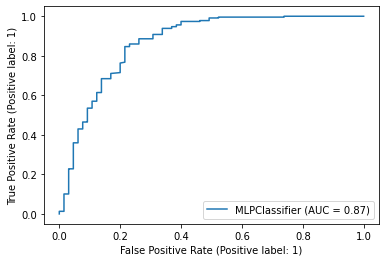

In [89]:
#with adam
fpr_mlp, tpr_mlp, thresholds = roc_curve(y_test, mlp_prob)
auc_score_mlp = auc(fpr_mlp, tpr_mlp)
metrics.plot_roc_curve(mlp, x_test, y_test)

In [90]:
auc_score_mlp

0.7835695006747638

## Plots

In [38]:
#mlp with hidden_layer_sizes=(100,100), max_iter=i, activation='logistic', solver='adam', alpha=0.0001
#plt.plot(max_iterations, mlp_iterations_acc_log)
#plt.title("Max Iterations with Activation Function Logistic")
#plt.xlabel("Iteration")
#plt.ylabel("Accuracy")

In [39]:
#mlp with hidden_layer_sizes=(100,100), max_iter=i, activation='relu', solver='adam', alpha=0.0001
#plt.plot(max_iterations, mlp_iterations_acc)
#plt.title("Max Iterations with Activation Function Relu")
#plt.xlabel("Iteration")
#plt.ylabel("Accuracy")

In [56]:
#ax2 = plt.axes([0, 0.6, 1, 1])
#plt.xticks(logistic_accuracy, y)
#plt.plot(y, logistic_accuracy)
#plt.title("Kmer combinations with Logistic Regression")
#plt.xlabel("Kmer Combination")
#plt.ylabel("Accuracy")

In [57]:
#ax2 = plt.axes([0, 0.6, 1, 1])
#plt.xticks(randomForest_accuracy, y)
#plt.plot(y, randomForest_accuracy)
#plt.title("Kmer combinations with Random Forrest Regression")
#plt.xlabel("Kmer Combination")
#plt.ylabel("Accuracy")

In [63]:
    v2 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(4, 4))
    dna = v2.fit_transform(y).toarray()    
    
    v1 = CountVectorizer(analyzer='char', stop_words=None, ngram_range=(4, 4))
    zinc_finger = v1.fit_transform(x).toarray()

    reg = SGDClassifier(loss='log').fit(X_train, y_train.ravel())
    y_pred_log = reg.predict(x_test)
    y_pred_log_prob = reg.predict(x_test)
    logistic_acc = accuracy_score(y_pred_log, y_test)
    logistic_accuracy.append(logistic_acc)
    #fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_log) 
    #plt.plot(fpr, tpr)
    #plt.show()
    log_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_log)
    fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_log_prob)
    auc_score_log = auc(fpr_log, tpr_log)
    
    
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train.ravel())
    y_pred_rf = clf.predict(x_test)
    y_pred_rf_prob = clf.predict(x_test)
    clf_acc = accuracy_score(y_pred_rf, y_test)
    randomForest_accuracy.append(clf_acc)
    #fpr_r, tpr_r, _ = metrics.roc_curve(y_test, y_pred_rf) 
    #plt.plot(fpr, tpr)
    rf_confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
    fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf_prob)
    auc_score_rf = auc(fpr_rf, tpr_rf)

In [80]:
auc_score_log

0.6373819163292846

In [82]:
auc_score_rf

0.7418016194331983

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


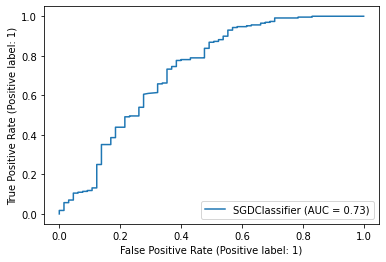

In [65]:
metrics.plot_roc_curve(reg, x_test, y_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


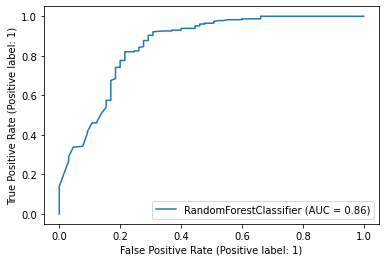

In [67]:
metrics.plot_roc_curve(clf, x_test, y_test)

In [51]:
log_confusion_matrix

array([[ 23,  42],
       [ 12, 216]])

# 

In [52]:
rf_confusion_matrix

array([[ 34,  31],
       [  8, 220]])

<AxesSubplot:>

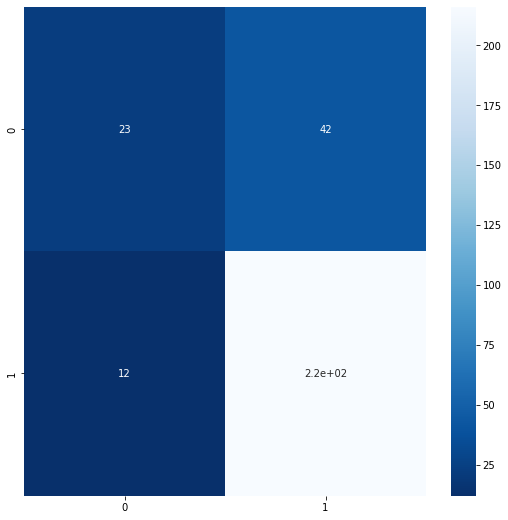

In [53]:
plt.figure(figsize=(9,9))
sns.heatmap(log_confusion_matrix, annot=True, cmap='Blues_r')

<AxesSubplot:>

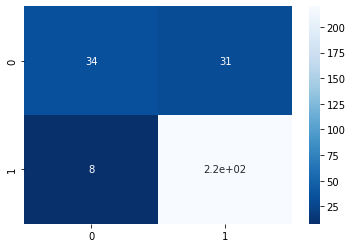

In [54]:
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues_r')